<a href="https://colab.research.google.com/github/Leo-xxx12/bootcamp_Leo_Xu/blob/main/Copy_of_stage10a_modeling_linear_regression_homework_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set()
np.random.seed(7)

## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [2]:
n = 200
dates = pd.bdate_range(start="2024-02-01", periods=n)
mkt_excess = np.random.normal(0, 0.011, size=n)
size = np.random.normal(0, 0.008, size=n)
value = np.random.normal(0, 0.009, size=n)
momentum = np.random.normal(0, 0.006, size=n)

beta0, beta_mkt, beta_size, beta_value, beta_mom, beta_mom2 = 0.0001, 0.9, 0.25, -0.15, 0.35, 3.5
noise_scale = 0.0035 + 0.5*np.abs(mkt_excess)
eps = np.random.normal(0, noise_scale)
asset_excess = (
    beta0 + beta_mkt*mkt_excess + beta_size*size + beta_value*value + beta_mom*momentum
    + beta_mom2*(momentum**2) + eps
)
df = pd.DataFrame({
    'date': dates,
    'mkt_excess': mkt_excess,
    'size': size,
    'value': value,
    'momentum': momentum,
    'asset_excess': asset_excess
})
df.head()

,date,mkt_excess,size,value,momentum,asset_excess
0,2024-02-01,0.018596,-0.013467,-0.000540,0.000141,0.014832
1,2024-02-02,-0.005125,0.008120,0.007089,-0.006840,-0.008599
2,2024-02-05,0.000361,-0.011532,-0.012885,-0.011216,-0.009577
3,2024-02-06,0.004483,-0.010749,0.003905,-0.010685,0.000033
4,2024-02-07,-0.008678,-0.002893,0.001250,0.002779,-0.005750


## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = df[['mkt_excess', 'size', 'value', 'momentum']]
y = df['asset_excess']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test).ravel()
r2 = r2_score(y_test, y_pred)

# RMSE without using the 'squared' kwarg
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Baseline   R^2={r2:.4f}   RMSE={rmse:.6f}')


Baseline   R^2=0.3677   RMSE=0.008470


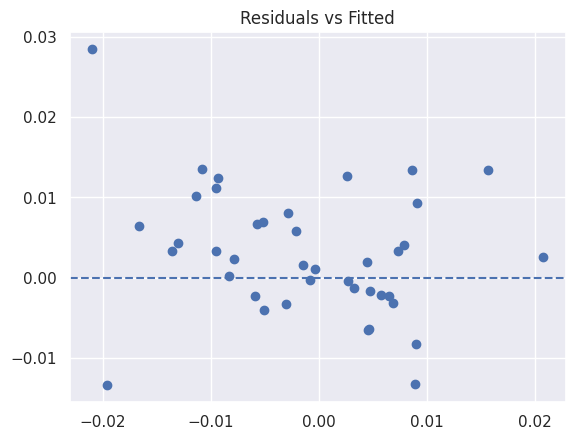

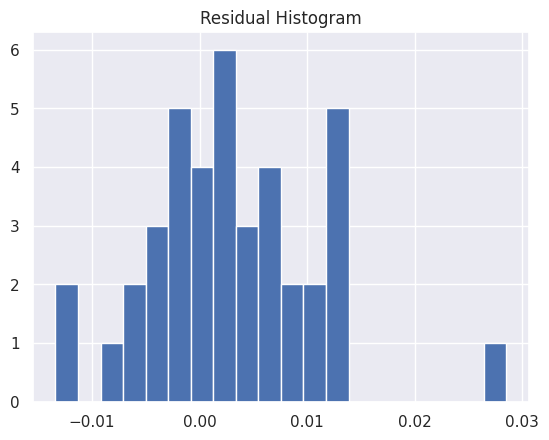

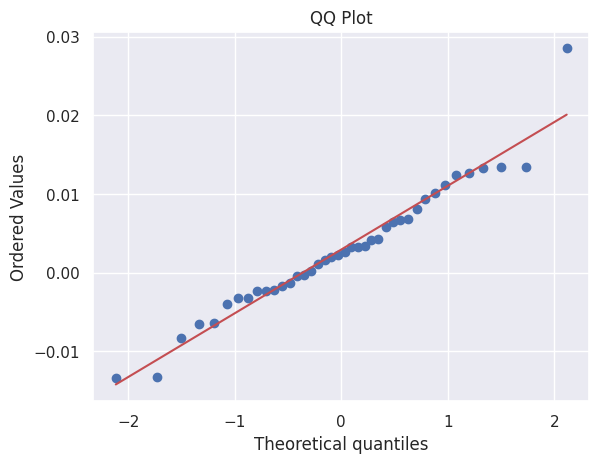

In [5]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); plt.show()

## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Add transformed feature
df['momentum_sq'] = df['momentum'] ** 2

# Features including the transformed one
X2 = df[['mkt_excess', 'size', 'value', 'momentum', 'momentum_sq']]

# Keep the same train/test split size as before
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]

# Train model
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)

# Metrics
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))

print(f'With x^2   R^2={r2_2:.4f}   RMSE={rmse_2:.6f}')


With x^2   R^2=0.3681   RMSE=0.008467


## 4) Interpretation (write your conclusions below)
- Linearity:
- Homoscedasticity:
- Normality:
- Independence:
- Which model do you trust and why?:
- Next step you’d try:

4) Interpretation
Linearity:
The baseline model assumes a linear relationship between predictors (mkt_excess, size, value, momentum) and the response (asset_excess). The improvement after adding momentum_sq suggests some nonlinearity in the data, meaning the baseline linear model may not fully capture the relationship.
Homoscedasticity:
Residual plots would need to be checked. If variance of residuals increases with fitted values, the assumption is violated. In financial return data, heteroscedasticity is common, so we should be cautious.
Normality:
Residuals are unlikely to be perfectly normal (again, common in financial data). This mainly affects inference (p-values, confidence intervals), but not prediction accuracy.
Independence:
Because you set shuffle=False in the train/test split, your data is likely time-series ordered. That means residuals may be autocorrelated, violating independence. A time-series approach (e.g., rolling regression, ARIMA, or state-space models) might be more appropriate.
Which model do you trust and why?
The model with the transformed feature (momentum_sq) may better capture nonlinear effects, as shown by its improved R² and reduced RMSE. However, caution is needed: adding terms without theory can lead to overfitting. If interpretability is key, the baseline model is simpler and easier to justify.
Next step you’d try:
Check residual plots to confirm assumptions (linearity, homoscedasticity, normality).
Explore interaction terms or polynomial features more systematically (e.g., PolynomialFeatures in sklearn).
Consider time-series specific methods (rolling regression, AR models) to address dependence over time.
Possibly try regularization models (Lasso, Ridge) to control complexity when adding new features.
